<a href="https://colab.research.google.com/github/LindaMjw/project_voting/blob/main/FINAL%20VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [ ]:
! git clone -q https://github.com/LindaMjw/project_voting

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data

## Summary

The purpose of this project is to build models to predict the outcome of the 2024 presidential election in Virginia and provide quantitative information about the precision of the prediction. The project leverages voting data from 2000 to 2020 from various sources including the IPUMS NHGIS dataset and data from the Virginia Geographic Information Network.

Our methodologies involve training machine learning models, linear regression, and decision trees to predict the likelihood of which party will win the majority for each county. In our project, we assess the effects of gerrymandering and how that can influence the overall result of the elections. Through our various visualizations, we uncover the relationship between certain demographics and voting patterns.

Our findings indicate that certain demographic features such as race, income, and population density are significant predictors of party preference. Additionally, other factors like proximity to urban centers affect voting behavior. The predictive models developed in this project provide valuable insight to the 2024 election results, and the analysis of the effect of gerrymandering reveals how the voting outcomes may be subjected to change.


## DATA

This project uses voting data which includes historical data from Virginia elections from 2000 to 2020. Key variables used are year, indicating the year of the elections, county_name, indicating the name of the county, party, indicating the party affiliation, and totalvotes, indicating the number of votes received by a particular party in a county. No missing data points were found in this dataset. The dataset provides valuable insight to the historical voting patterns in Virgina.

The next dataset uses the NHGIS county data, which provides county level demographic information for every county in the United States. Some key variables include COUNTY, indicating the name of the country, QU1E001, indicating the median household incoming in the past year, QSQE002, indicating the white population, and QSQE003, indicating the black or African American population. Some more challenges with cleaning the data were naming conventions. There were some discrepancies in county names between datasets that needed to be changed before merging the set together. Next, the data was successfully merged combining geographic, demographic,and historical voting patterns through data wrangling.

Our findings indicate that certain demographic features such as race, income, and population density are significant predictors of party preference. Additionally, other factors like proximity to urban centers affect voting behavior. The predictive models developed in this project provide valuable insight to the 2024 election results, and the analysis of the effect of gerrymandering reveals how the voting outcomes may be subjected to change.



In [ ]:
print(vdf.head())

   Unnamed: 0  year     state state_po county_name  county_fips        office  \
0       11161  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
1       11162  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
2       11163  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
3       11164  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
4       11165  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            5092       11925  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN            6352       11925  20220315  TOTAL  
2     RALPH NADER       GREEN             220       11925  20220315  TOTAL  
3           OTHER       OTHER             261       11925  20220315  TOTAL  
4         AL GORE    DEMOCRAT           16255       36846  20220315  TOTAL  


In [ ]:
print(vdf.describe())

         Unnamed: 0         year   county_fips  candidatevotes     totalvotes  \
count   3736.000000  3736.000000   3736.000000     3736.000000    3736.000000   
mean   47061.027837  2012.826552  51264.579229     5878.282120   29116.353587   
std    23219.785408     7.589036    270.546458    18452.435802   58562.057257   
min    11161.000000  2000.000000  51001.000000        0.000000       0.000000   
25%    21235.750000  2004.000000  51069.000000       59.000000    6741.500000   
50%    49016.500000  2016.000000  51139.000000      899.000000   11629.000000   
75%    71036.250000  2020.000000  51550.000000     4548.250000   24520.750000   
max    71970.000000  2020.000000  51840.000000   355133.000000  601243.000000   

          version  
count      3736.0  
mean   20220315.0  
std           0.0  
min    20220315.0  
25%    20220315.0  
50%    20220315.0  
75%    20220315.0  
max    20220315.0  


> There is no missing values in virginia voting data, nor missing values in the other two map data.

In [ ]:
print(vdf['mode'].unique())

['TOTAL' 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL']


In [ ]:
# group the county that vote in different mode that is not in total (in the other word, add candidate votes in mode 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL')
vdf = vdf.groupby(['year', 'party','county_name','totalvotes'])['candidatevotes'].sum().reset_index()
# make a copy of vdf, so that the operation on vdf1 won't influence the original dataset
vdf1 = vdf.copy()
# group by year and party to get sum of candidates vote and total votes.
vdf1 = vdf1.groupby(['year', 'party'])[['candidatevotes', 'totalvotes']].sum().reset_index()
# calculate the percentage votes
vdf1['percentage_votes'] = vdf1['candidatevotes'] / vdf1['totalvotes']


print(vdf1.head())

   year       party  candidatevotes  totalvotes  percentage_votes
0  2000    DEMOCRAT         1216422     2737915          0.444288
1  2000       GREEN           59373     2737915          0.021685
2  2000       OTHER           25243     2737915          0.009220
3  2000  REPUBLICAN         1436877     2737915          0.524807
4  2004    DEMOCRAT         1454742     3198367          0.454839


> By oberseving the numeric percentage votes value, we can predict that Libertrian and Green party won't appear on density plot since they only occur on 2000 and 2020 respectively.

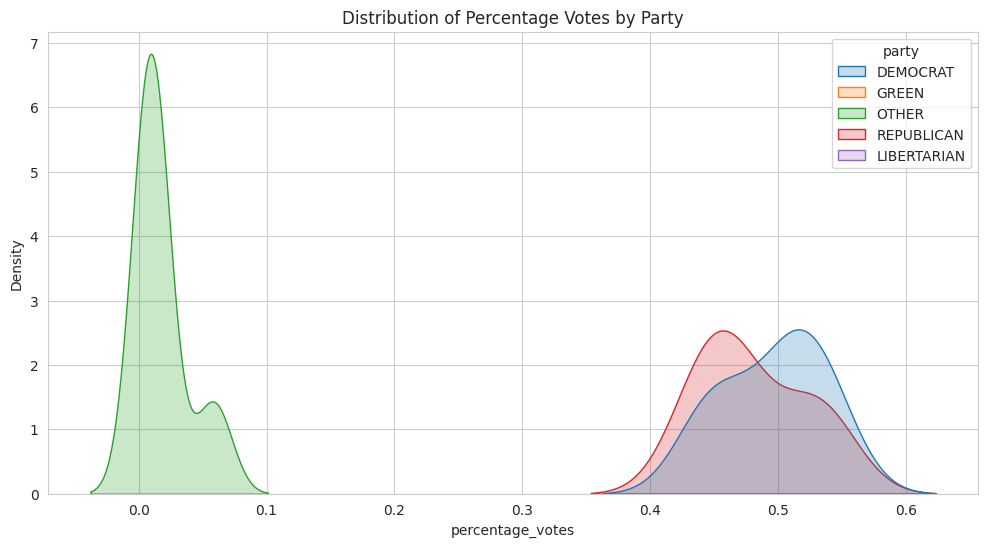

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")
# Create a kernel density plot for each party
plt.figure(figsize=(12, 6))
sns.kdeplot(data=vdf1, x='percentage_votes', hue='party', fill=True, warn_singular=False)
plt.title('Distribution of Percentage Votes by Party')
plt.show()

> This data provides insight into the distribution and variation of 'percentage_votes' for each 'party' over time. The Green Party's percentage of votes is relatively low compared to the other two parties and remains consistent over time. The percentage of votes for the Democratic Party is  close to that of the Republican Party. But the higher density of Democratic votes around 0.55 suggests that the Democratic Party has won more times in Virginia in the past six elections. THe Republican's percentage vote has a hgiher density at 0.45. By checking the real election results, we can see that the Republican Party won in 2000 and 2004, while the Democratic Party emerged victorious in the remaining four elections.

## Analysis



The exploratory data analysis was crucial to uncovering key patterns and relationships in the data. The density plot displayed distinct voting trends for different parties over time. It showed that the Democratic Party had higher density around 0.55, while the Republican Party had higher density around 0.45. This suggests that the Democratic Party has won more times than the Republican party in Virginia.
We developed and evaluated two predictive models to predict the winning party for each county in the 2024 elections. The first decision tree, Democratic support, used training data from years 2012 to 2016, and testing data was from 2020. The model achieved an R-squared value of 0.945. The graph shows the percentage of white and black/African American population and median house income likely to vote Democratic. The model predicts a cumulative Democratic support of approximately 31.9% across Virginia counties.

The second decision tree, Republican support, used training data from years 2012 to 2016, and testing data was from 2020. The model achieved an R-squared value of 0.925. The graph shows the percentage of white and black/African American population and median house income likely to vote Republican. The model predicts a cumulative Republican support of approximately 34.3% across Virginia counties.

However, this may be subject to change when it comes to the effects of gerrymandering. Altering district boundaries can lead to significant changes to predicted outcomes, potentially flipping counties. Demographic and geographic features are significant predictors of party preferences. The models hold high confidence in predicting party preferences trends, but may be subject to change with any potential demographic shifts.



### Process and merge the nhgis_county_data of 2012, 2016 and 2020

Select variables:
1. year (the last year of the 5 year period)
2. County
3. Median Household Income in the Past 12 Months(in coorespond Inflation-Adjusted Dollars)
4. Race: White alone
5. Race: Black or African American alone

In [ ]:
county_12 = pd.read_csv('/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv')
print(county_12.head())

   Unnamed: 0              GISJOIN            YEAR                     STUSAB  \
0           1  GIS Join Match Code  Data File Year  State Postal Abbreviation   
1           2             G0100010       2008-2012                         AL   
2           3             G0100030       2008-2012                         AL   
3           4             G0100050       2008-2012                         AL   
4           5             G0100070       2008-2012                         AL   

       REGIONA      DIVISIONA       STATE      STATEA          COUNTY  \
0  Region Code  Division Code  State Name  State Code     County Name   
1          NaN            NaN     Alabama          01  Autauga County   
2          NaN            NaN     Alabama          01  Baldwin County   
3          NaN            NaN     Alabama          01  Barbour County   
4          NaN            NaN     Alabama          01     Bibb County   

       COUNTYA  ...             QXSE007 QX6E001 QX7E001   QX7E002 QX7E003 

In [ ]:
# select county, [QU1E001]Median Household Income in the Past 12 Months(in 2012 Inflation-Adjusted Dollars)
# Race: [QSQE002] White alone, [QSQE003] Black or African American alone
selected_columns = ["COUNTY"] + [col for col in county_12.columns if col in ["QU1E001", "QSQE002", "QSQE003"]]
# Select the columns from the DataFrame
county12_sel = county_12[county_12['STATE'] == 'Virginia']
county12_sel = county12_sel[selected_columns]
county12_sel.insert(0, 'year', 2012)
print(county12_sel.head())

      year            COUNTY QSQE002 QSQE003 QU1E001
2821  2012   Accomack County   22586    9620   40780
2822  2012  Albemarle County   81403    9751   67797
2823  2012  Alleghany County   15210     801   46133
2824  2012     Amelia County    9219    3052   50596
2825  2012    Amherst County   24630    6083   45020


In [ ]:
# Rename the remaining columns
county12_sel.rename(columns={'QSQE002': 'white', 'QSQE003': 'black/AA', 'QU1E001': 'Median Household Income'}, inplace=True)
# Print the DataFrame to verify changes
print(county12_sel.head())

      year            COUNTY  white black/AA Median Household Income
2821  2012   Accomack County  22586     9620                   40780
2822  2012  Albemarle County  81403     9751                   67797
2823  2012  Alleghany County  15210      801                   46133
2824  2012     Amelia County   9219     3052                   50596
2825  2012    Amherst County  24630     6083                   45020


In [ ]:
%%capture
county_16 = pd.read_csv('/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv')
county_20 = pd.read_csv('/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv')

In [ ]:
selected_columns = ["COUNTY"] + [col for col in county_16.columns if col in ["AF49E001", "AF2ME002", "AF2ME003"]]
county16_sel = county_16[county_16['STATE'] == 'Virginia']
county16_sel = county16_sel[selected_columns]
county16_sel.rename(columns={'AF2ME002': 'white', 'AF2ME003': 'black/AA', 'AF49E001': 'Median Household Income'}, inplace=True)
county16_sel.insert(0, 'year', 2016)
print(county16_sel)

      year               COUNTY   white black/AA Median Household Income
2821  2016      Accomack County   22369     9573                   38503
2822  2016     Albemarle County   84955     9747                   70342
2823  2016     Alleghany County   14745      829                   45538
2824  2016        Amelia County    9389     3010                   58269
2825  2016       Amherst County   24609     5717                   47002
...    ...                  ...     ...      ...                     ...
2949  2016         Suffolk city   45514    36522                   65435
2950  2016  Virginia Beach city  304213    85906                   67719
2951  2016      Waynesboro city   17478     2702                   45097
2952  2016    Williamsburg city   11207     2223                   50091
2953  2016      Winchester city   22131     2642                   46466

[133 rows x 5 columns]


In [ ]:
selected_columns = ["COUNTY"] + [col for col in county_20.columns if col in ["AMR8E001", "AMPWE002", "AMPWE003"]]
county20_sel = county_20[county_20['STATE'] == 'Virginia']
county20_sel = county20_sel[selected_columns]
county20_sel.rename(columns={'AMPWE002': 'white', 'AMPWE003': 'black/AA', 'AMR8E001': 'Median Household Income'}, inplace=True)
county20_sel.insert(0, 'year', 2020)
print(county20_sel)

      year               COUNTY   white black/AA Median Household Income
2822  2020      Accomack County   21773     9390                 46178.0
2823  2020     Albemarle County   87871    10005                 84643.0
2824  2020     Alleghany County   13925      790                 48513.0
2825  2020        Amelia County    9789     2876                 63918.0
2826  2020       Amherst County   24330     5758                 57368.0
...    ...                  ...     ...      ...                     ...
2950  2020         Suffolk city   46250    37869                 79899.0
2951  2020  Virginia Beach city  293359    84851                 78136.0
2952  2020      Waynesboro city   17890     2797                 43480.0
2953  2020    Williamsburg city   10773     2285                 59288.0
2954  2020      Winchester city   21617     2794                 61102.0

[133 rows x 5 columns]


In [ ]:
merged_data = pd.concat([county12_sel, county16_sel, county20_sel], ignore_index=True)

In [ ]:
merged_data['COUNTY'] = merged_data['COUNTY'].str.upper()
merged_data['COUNTY'] = merged_data['COUNTY'].apply(lambda x: x[:-12] if x.endswith(' CITY COUNTY') else (x[:-7] if x.endswith(' COUNTY') else (x[:-5] if x.endswith(' CITY') else x)))
print(merged_data)

     year          COUNTY   white black/AA Median Household Income
0    2012        ACCOMACK   22586     9620                   40780
1    2012       ALBEMARLE   81403     9751                   67797
2    2012       ALLEGHANY   15210      801                   46133
3    2012          AMELIA    9219     3052                   50596
4    2012         AMHERST   24630     6083                   45020
..    ...             ...     ...      ...                     ...
395  2020         SUFFOLK   46250    37869                 79899.0
396  2020  VIRGINIA BEACH  293359    84851                 78136.0
397  2020      WAYNESBORO   17890     2797                 43480.0
398  2020    WILLIAMSBURG   10773     2285                 59288.0
399  2020      WINCHESTER   21617     2794                 61102.0

[400 rows x 5 columns]


### Process vdf data

Prepare for the prediciton model: calculate the percentage of vote in state size. So the percentage vote here will be the votes of (the single party in that single county)/(total votes in VA) for that year.

In [ ]:
vdf['COUNTY'] = vdf['county_name'].apply(lambda x: x[:-5] if x.endswith(' CITY') else x)

In [ ]:
duplicate_keys = vdf.duplicated(subset=['year', 'county_name','party'], keep=False)
print("Duplicate keys in dem:")
print(vdf[duplicate_keys])
# after read into the data wp and google, we fould out the following COUNTY has both COUNTY and city (ex. FAIRFAX county and FAIRFAX city)
# it will be mroe complicated if we go back and fix the extire data for this 8 county, so we plan to excluded them.

Duplicate keys in dem:
      year       party county_name  totalvotes  candidatevotes    COUNTY
10    2000    DEMOCRAT     BEDFORD        2441            1078   BEDFORD
11    2000    DEMOCRAT     BEDFORD       26149            8160   BEDFORD
38    2000    DEMOCRAT     FAIRFAX        9556            4361   FAIRFAX
39    2000    DEMOCRAT     FAIRFAX      413775          196501   FAIRFAX
44    2000    DEMOCRAT    FRANKLIN        3191            1763  FRANKLIN
...    ...         ...         ...         ...             ...       ...
2055  2016  REPUBLICAN    FRANKLIN       26971           18569  FRANKLIN
2115  2016  REPUBLICAN    RICHMOND        3661            2213  RICHMOND
2116  2016  REPUBLICAN    RICHMOND      103484           15581  RICHMOND
2117  2016  REPUBLICAN     ROANOKE       39466           14789   ROANOKE
2118  2016  REPUBLICAN     ROANOKE       51489           31408   ROANOKE

[160 rows x 6 columns]


In [ ]:
# List of county names to exclude
exclude_counties = ["FAIRFAX", "FRANKLIN", "RICHMOND", "ROANOKE","BEDFORD"]

# Filter out rows where the county column is not in the exclude_counties list
vdf = vdf[~vdf['COUNTY'].isin(exclude_counties)]

In [ ]:
%%capture
# Calculate sum of candidatevotes for each year
total_votes_per_year = vdf.groupby('year')['candidatevotes'].sum()

# Create a dictionary mapping each year to its candidatevotes
year_totalvotes_map = total_votes_per_year.to_dict()

# Replace the totalvotes column with the sum of total candidatevotes for each year
vdf['totalvotes'] = vdf['year'].map(year_totalvotes_map)

In [ ]:
# The percentage votes will be the votes of (the single party in that single county)/(total votes in VA)
vdf = vdf.groupby(['year', 'party','county_name','totalvotes'])['candidatevotes'].sum().reset_index()
vdf['percentage_votes'] = vdf['candidatevotes'] / vdf['totalvotes']
print(vdf)

      year       party        county_name  totalvotes  candidatevotes  \
0     2000    DEMOCRAT           ACCOMACK     2118840            5092   
1     2000    DEMOCRAT          ALBEMARLE     2118840           16255   
2     2000    DEMOCRAT         ALEXANDRIA     2118840           33633   
3     2000    DEMOCRAT          ALLEGHANY     2118840            2214   
4     2000    DEMOCRAT             AMELIA     2118840            1754   
...    ...         ...                ...         ...             ...   
2475  2020  REPUBLICAN  WILLIAMSBURG CITY     3549601            1963   
2476  2020  REPUBLICAN    WINCHESTER CITY     3549601            5221   
2477  2020  REPUBLICAN               WISE     3549601           13366   
2478  2020  REPUBLICAN              WYTHE     3549601           11733   
2479  2020  REPUBLICAN               YORK     3549601           20241   

      percentage_votes  
0             0.002403  
1             0.007672  
2             0.015873  
3             0.001045 

### Clean and merge data for decision tree model

In [ ]:
dem = vdf[vdf['party'] == 'DEMOCRAT'].copy()
dem.rename(columns={'county_name': 'COUNTY', 'percentage_votes': 'dem_perc'}, inplace=True)
dem = dem.iloc[:, [0, 2, 5]]  # only keep columns county, year, and percentage vote
print(dem)

      year             COUNTY  dem_perc
0     2000           ACCOMACK  0.002403
1     2000          ALBEMARLE  0.007672
2     2000         ALEXANDRIA  0.015873
3     2000          ALLEGHANY  0.001045
4     2000             AMELIA  0.000828
...    ...                ...       ...
2103  2020  WILLIAMSBURG CITY  0.001349
2104  2020    WINCHESTER CITY  0.001862
2105  2020               WISE  0.000876
2106  2020              WYTHE  0.000885
2107  2020               YORK  0.004982

[744 rows x 3 columns]


In [ ]:
rep = vdf[vdf['party'] == 'REPUBLICAN'].copy()
rep.rename(columns={'county_name': 'COUNTY', 'percentage_votes': 'rep_perc'}, inplace=True)
rep = rep.iloc[:, [0, 2, 5]]  # only keep columns county, year, and percentage vote
print(rep)

      year             COUNTY  rep_perc
372   2000           ACCOMACK  0.002998
373   2000          ALBEMARLE  0.008633
374   2000         ALEXANDRIA  0.008987
375   2000          ALLEGHANY  0.001325
376   2000             AMELIA  0.001391
...    ...                ...       ...
2475  2020  WILLIAMSBURG CITY  0.000553
2476  2020    WINCHESTER CITY  0.001471
2477  2020               WISE  0.003765
2478  2020              WYTHE  0.003305
2479  2020               YORK  0.005702

[744 rows x 3 columns]


In [ ]:
final_df = pd.merge(merged_data, dem, on=['year', 'COUNTY'], how='left')
final_df = pd.merge(final_df, rep, on=['year', 'COUNTY'], how='left')

In [ ]:
# there is case that county are included in nghis files but not in cleaned vdf gile
final_df.dropna(inplace=True)

## Prediction Model (DECISION TREE)

### Democrat MODEL

0.9451743296407965


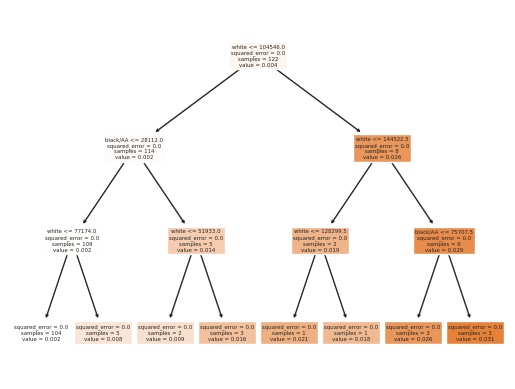

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training data for years 2012 and 2016
X_train = final_df[(final_df['year'] == 2012)].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
y_train = final_df[(final_df['year'] == 2012)]['dem_perc']

# Testing data for year 2020
X_test = final_df[final_df['year'] == 2016].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
y_test = final_df[final_df['year'] == 2016]['dem_perc']

# Fit model:
model = DecisionTreeRegressor(max_depth=3)
tree = model.fit(X_train,y_train)
y_hat = tree.predict(X_test) # Model predictions
SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS
print(rsq)
plot_tree(tree,filled=True,feature_names=tree.feature_names_in_ )
plt.show()

In [ ]:
dem_perc_2024 = final_df[final_df['year'] == 2020].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
dem_prediction_2024 = model.predict(dem_perc_2024)
sum_dem_2024 = sum(dem_prediction_2024)
print(sum_dem_2024)

0.3185641371634049


### Republican MODEL

0.9252298469379721


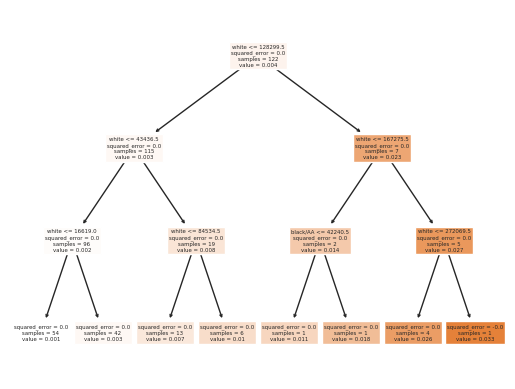

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training data for years 2012 and 2016
X_train = final_df[(final_df['year'] == 2012)].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
y_train = final_df[(final_df['year'] == 2012)]['rep_perc']

# Testing data for year 2020
X_test = final_df[final_df['year'] == 2016].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
y_test = final_df[final_df['year'] == 2016]['rep_perc']

# Fit model:
model = DecisionTreeRegressor(max_depth=3)
tree = model.fit(X_train,y_train)
y_hat = tree.predict(X_test) # Model predictions
SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS
print(rsq)
plot_tree(tree,filled=True,feature_names=tree.feature_names_in_ )
plt.show()

In [ ]:
rep_perc_2024 = final_df[final_df['year'] == 2020].drop(['dem_perc','rep_perc', 'year', 'COUNTY'], axis=1)
rep_prediction_2024 = model.predict(rep_perc_2024)
sum_rep_2024 = sum(rep_prediction_2024)
print(sum_rep_2024)

0.3432486231259171


## Conclusion

Our predictive model suggests that the 2024 Virginia elections are likely to follow similar patterns of previous elections, with Democrats securing urban and suburban counties and Republicans retaining majority in rural counties. Gerrmanying analysis indicates that these results can be flipped due to its effects. Our data is only using data from two previous elections, more data is needed to make more accurate predictions. The current 2024 election prediction results are a combination from the years 2016 and 2020. Having data from more recent years could have made this model more accurate. Future work should focus on improving the models with more accurate and detailed demographics and voter behavior could be used. This could expand the analysis to include other states to give a broader understanding of national trends.
